In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# get the training data

dfx_train = pd.read_csv("./Training Data/Linear_X_Train.csv", skiprows=1, header=None)
dfy_train = pd.read_csv("./Training Data/Linear_Y_Train.csv", skiprows=1, header=None)

dfx_train = dfx_train.values
dfy_train = dfy_train.values

x = dfx_train.reshape((-1,))
y = dfy_train.reshape((-1,))

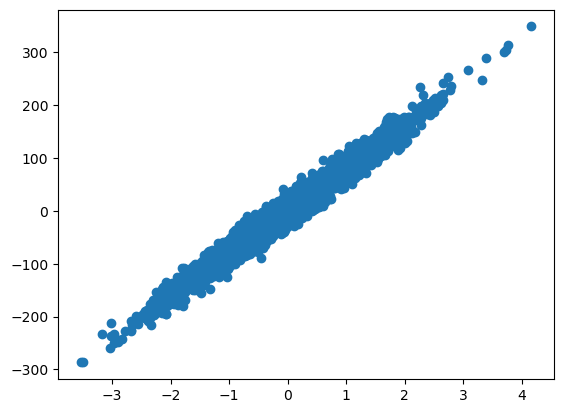

In [7]:
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X, Y)
plt.show()

In [8]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        itr += 1
    
    return theta,error_list,theta_list

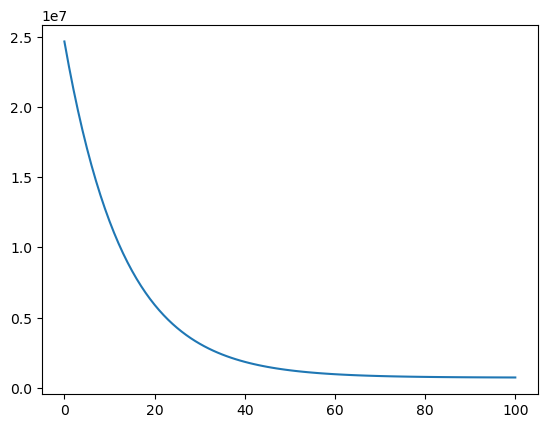

[ 0.62734458 78.22285939]


In [28]:
final_theta, error_list,theta_list = gradientDescent(X,Y,1e-5)
plt.plot(error_list)
plt.show()
print(final_theta)

In [29]:
dfx_test = pd.read_csv("./Testing Data/Linear_X_Test.csv", skiprows=1, header=None)
dfx_test = dfx_test.values
x_test = dfx_test.reshape((-1,))
X_test = (x_test-x_test.mean())/x_test.std()
print(X_test)

[-1.82943706 -0.82513663 -2.47869347 ...  0.1673453  -0.23684394
 -0.63739233]


In [30]:
y_pred = hypothesis(X_test, final_theta)
dfy_pred = pd.DataFrame({'y_pred': y_pred})
dfy_pred.to_csv("./y_pred.csv", index=False)
dfy_pred

,y_pred
0,-142.476453
1,-63.917202
2,-193.263146
3,218.674369
4,49.768597
...,...
1245,-9.335712
1246,76.337976
1247,13.717573
1248,-17.899265


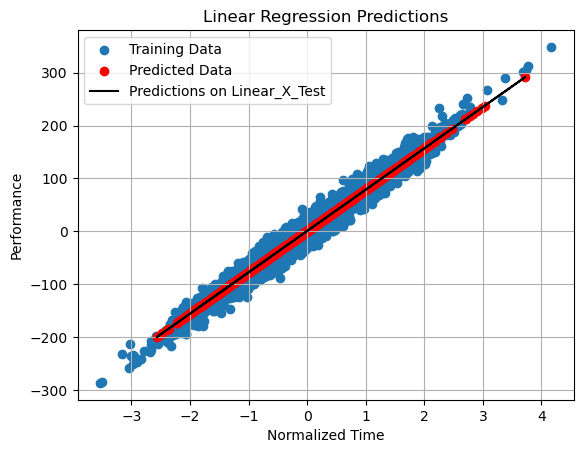

In [33]:
# Plot predictions
plt.scatter(X, Y, label='Training Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.plot(X_test, y_pred, color='black', label='Predictions on Linear_X_Test')
plt.legend()
plt.title("Linear Regression Predictions")
plt.xlabel("Normalized Time")
plt.ylabel("Performance")
plt.grid(True)
plt.show()